<a href="https://colab.research.google.com/github/HassanDataSci/caricon-personality-career-matching/blob/main/CariCon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

# Load each file into its own DataFrame
df_mbti   = pd.read_excel("myer-briggs-data.xlsx")
df_onet  = pd.read_excel("complete_onet_data_with_human_characteristics.xlsx")

print("MBTI shape:", df_mbti.shape)
print("Human characteristics shape:", df_onet.shape)

MBTI shape: (8675, 2)
Human characteristics shape: (1016, 30)


In [14]:
print("=== MBTI Data ===")
print(df_mbti.dtypes)
print()

print("=== O*NET Human Characteristics ===")
print(df_onet.dtypes)
print()

=== MBTI Data ===
type     object
posts    object
dtype: object

=== O*NET Human Characteristics ===
Occupation Code              object
Title                        object
Human Characteristics        object
Description                  object
Sample Job Titles            object
Tasks                        object
Knowledge                    object
Skills                       object
Abilities                    object
Work Activities              object
Detailed Work Activities     object
Tools Used                   object
Technology Used              object
Job Zone                     object
Education Level              object
Experience Required          object
Job Training                 object
SVP Range                    object
Job Zone Examples            object
Interests                    object
Work Styles                  object
Work Values                  object
Work Context                 object
Additional Sources           object
Related Occupations          object

# Handling Missing Data

In [15]:
nan_count = np.sum(df_onet.isnull())
print(nan_count)

Occupation Code               0
Title                         0
Human Characteristics         0
Description                   0
Sample Job Titles           115
Tasks                        93
Knowledge                   143
Skills                      147
Abilities                   138
Work Activities             137
Detailed Work Activities     93
Tools Used                  119
Technology Used              93
Job Zone                     93
Education Level              93
Experience Required          93
Job Training                 93
SVP Range                    93
Job Zone Examples            93
Interests                    93
Work Styles                 137
Work Values                 142
Work Context                137
Additional Sources           67
Related Occupations          93
Annual 10th Percentile       26
Annual 25th Percentile       26
Annual Median Wage           26
Annual 75th Percentile       26
Annual 90th Percentile       26
dtype: int64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [16]:
# many of the missing values come from rows with "All Other" in the title
df_onet['Title'].str.contains("All Other", case=False).value_counts()

,count
Title,
False,939
True,77


In [17]:
# So we can drop rows with all other
df_onet = df_onet[~df_onet['Title'].str.contains("All Other", case=False)]
df_onet.shape

(939, 30)

In [18]:
nan_count = np.sum(df_onet.isnull())
print(nan_count)

Occupation Code              0
Title                        0
Human Characteristics        0
Description                  0
Sample Job Titles           38
Tasks                       16
Knowledge                   66
Skills                      70
Abilities                   61
Work Activities             60
Detailed Work Activities    16
Tools Used                  42
Technology Used             16
Job Zone                    16
Education Level             16
Experience Required         16
Job Training                16
SVP Range                   16
Job Zone Examples           16
Interests                   16
Work Styles                 60
Work Values                 65
Work Context                60
Additional Sources          17
Related Occupations         16
Annual 10th Percentile      22
Annual 25th Percentile      22
Annual Median Wage          22
Annual 75th Percentile      22
Annual 90th Percentile      22
dtype: int64


In [19]:
# 16 of the same rows all have missing values across mutiple columns, these are primarily military roles
df_onet[df_onet['Technology Used'].isnull()]['Title']


,Title
22,Air Crew Members
23,Air Crew Officers
26,Aircraft Launch and Recovery Officers
27,Aircraft Launch and Recovery Specialists
54,Armored Assault Vehicle Crew Members
55,Armored Assault Vehicle Officers
59,Artillery and Missile Crew Members
60,Artillery and Missile Officers
167,Command and Control Center Officers
168,Command and Control Center Specialists


In [20]:
# so we can drop those roles
df_onet = df_onet[~df_onet['Technology Used'].isnull()]

nan_count = np.sum(df_onet.isnull())
print(nan_count)

Occupation Code              0
Title                        0
Human Characteristics        0
Description                  0
Sample Job Titles           22
Tasks                        0
Knowledge                   50
Skills                      54
Abilities                   45
Work Activities             44
Detailed Work Activities     0
Tools Used                  26
Technology Used              0
Job Zone                     0
Education Level              0
Experience Required          0
Job Training                 0
SVP Range                    0
Job Zone Examples            0
Interests                    0
Work Styles                 44
Work Values                 49
Work Context                44
Additional Sources           1
Related Occupations          0
Annual 10th Percentile       6
Annual 25th Percentile       6
Annual Median Wage           6
Annual 75th Percentile       6
Annual 90th Percentile       6
dtype: int64


In [21]:
# Drop some irrelevant columns that we won't use as predictors
df_onet.drop(columns=['Tools Used','Sample Job Titles','Additional Sources'], inplace=True)
df_onet.drop(df_onet.columns[-5:], axis=1, inplace=True)

In [22]:
nan_count = np.sum(df_onet.isnull())
print(nan_count)

Occupation Code              0
Title                        0
Human Characteristics        0
Description                  0
Tasks                        0
Knowledge                   50
Skills                      54
Abilities                   45
Work Activities             44
Detailed Work Activities     0
Technology Used              0
Job Zone                     0
Education Level              0
Experience Required          0
Job Training                 0
SVP Range                    0
Job Zone Examples            0
Interests                    0
Work Styles                 44
Work Values                 49
Work Context                44
Related Occupations          0
dtype: int64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


These are the roles that still have missing data in columns that we care about, and it's a total of 65 roles. To fill in these missing values, we would have to go online and manually search for skills, abilities, work values, etc.

It could be worth it to spend time doing so in the future. But for now, I think it's more efficient to just drop these roles.

In [23]:
roles_missing_vals = df_onet[df_onet.isnull().any(axis=1)]['Title'].to_list()
roles_missing_vals

['Aircraft Service Attendants',
 'Appraisers of Personal and Business Property',
 'Blockchain Engineers',
 'Bus Drivers, School',
 'Calibration Technologists and Technicians',
 'Cardiologists',
 'Clinical Neuropsychologists',
 'Crematory Operators',
 'Cutters and Trimmers, Hand',
 'Data Scientists',
 'Digital Forensics Analysts',
 'Disc Jockeys, Except Radio',
 'Dishwashers',
 'Electrical and Electronic Equipment Assemblers',
 'Emergency Medical Technicians',
 'Emergency Medicine Physicians',
 'Entertainment and Recreation Managers, Except Gambling',
 'Facilities Managers',
 'Fallers',
 'Farmworkers and Laborers, Crop, Nursery, and Greenhouse',
 'Financial and Investment Analysts',
 'Financial Risk Specialists',
 'First-Line Supervisors of Entertainment and Recreation Workers, Except Gambling Services',
 'First-Line Supervisors of Passenger Attendants',
 'First-Line Supervisors of Security Workers',
 'Fundraising Managers',
 'Graders and Sorters, Agricultural Products',
 'Health Inform

In [24]:
df_onet = df_onet[~df_onet['Title'].isin(roles_missing_vals)]
np.sum(df_onet.isnull()).sum()

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


np.int64(0)

## Encoding

In [25]:
df_onet.columns

Index(['Occupation Code', 'Title', 'Human Characteristics', 'Description',
       'Tasks', 'Knowledge', 'Skills', 'Abilities', 'Work Activities',
       'Detailed Work Activities', 'Technology Used', 'Job Zone',
       'Education Level', 'Experience Required', 'Job Training', 'SVP Range',
       'Job Zone Examples', 'Interests', 'Work Styles', 'Work Values',
       'Work Context', 'Related Occupations'],
      dtype='object')

In [26]:
features = ['Human Characteristics', 'Interests', 'Work Styles', 'Work Values', 'Skills']

In [27]:
df_onet['Human Characteristics'].head(3)

,Human Characteristics
0,"Attention to Detail, Analytical Thinking, Inte..."
1,"Communication, Adaptability, Problem Solving, ..."
2,"Communication, Adaptability, Problem Solving, ..."


In [28]:
import re
import pandas as pd

def encode_comma_separated_cols(df, cols,
                                new_suffix='_list',
                                sep_pattern=r'[,\;\|\n]+',
                                to_lower=True,
                                unique=True,
                                replace=False):
    """
    Parse comma/semicolon/pipe/newline-separated string columns into lists.
    - df: pandas DataFrame
    - cols: list of column names to parse
    - new_suffix: suffix for the created columns (original preserved unless replace=True)
    - sep_pattern: regex for delimiters
    - to_lower: normalize tokens to lowercase
    - unique: remove duplicate tokens while preserving order
    - replace: if True, overwrite original columns with lists (instead of creating new columns)
    Returns a copy of df with new/updated columns.
    """
    df = df.copy()
    def _parse_cell(x):
        if pd.isna(x):
            return []
        if isinstance(x, (list, tuple)):
            items = list(x)
        else:
            items = [t.strip() for t in re.split(sep_pattern, str(x)) if t.strip()]
        if to_lower:
            items = [t.lower() for t in items]
        if unique:
            # preserve order
            seen = {}
            items = [seen.setdefault(it, it) for it in items if it not in seen]
        return items

    for col in cols:
        if col not in df.columns:
            continue
        parsed = df[col].apply(_parse_cell)
        if replace:
            df[col] = parsed
        else:
            df[col + new_suffix] = parsed
    return df

# Example usage (adjust column names to match your df_onet):
cols_to_encode = features  # List of columns to parse
df_onet = encode_comma_separated_cols(df_onet, cols_to_encode, new_suffix='_list', replace=False)
#set replace=True if you want to overwrite original columns

In [29]:
df_onet.columns

Index(['Occupation Code', 'Title', 'Human Characteristics', 'Description',
       'Tasks', 'Knowledge', 'Skills', 'Abilities', 'Work Activities',
       'Detailed Work Activities', 'Technology Used', 'Job Zone',
       'Education Level', 'Experience Required', 'Job Training', 'SVP Range',
       'Job Zone Examples', 'Interests', 'Work Styles', 'Work Values',
       'Work Context', 'Related Occupations', 'Human Characteristics_list',
       'Interests_list', 'Work Styles_list', 'Work Values_list',
       'Skills_list'],
      dtype='object')

In [30]:
df_onet['Human Characteristics_list'].head(3)

,Human Characteristics_list
0,"[attention to detail, analytical thinking, int..."
1,"[communication, adaptability, problem solving,..."
2,"[communication, adaptability, problem solving,..."


In [31]:
for col in df_onet.columns:
    if col.endswith('_list'):
        print(df_onet[col].head(1))

0    [attention to detail, analytical thinking, int...
Name: Human Characteristics_list, dtype: object
0    [conventional, enterprising, investigative]
Name: Interests_list, dtype: object
0    [attention to detail, integrity, dependability...
Name: Work Styles_list, dtype: object
0    [achievement, independence, recognition]
Name: Work Values_list, dtype: object
0    [reading comprehension, active listening, crit...
Name: Skills_list, dtype: object


In [32]:
# make df_onet include only the list columns plus Title
list_cols = [col for col in df_onet.columns if col.endswith('_list')]
df_onet = df_onet[['Title'] + list_cols]
df_onet.head(3)

,Title,Human Characteristics_list,Interests_list,Work Styles_list,Work Values_list,Skills_list
0,Accountants and Auditors,"[attention to detail, analytical thinking, int...","[conventional, enterprising, investigative]","[attention to detail, integrity, dependability...","[achievement, independence, recognition]","[reading comprehension, active listening, crit..."
1,Actors,"[communication, adaptability, problem solving,...","[artistic, social, enterprising]","[cooperation, persistence, adaptability/flexib...","[relationships, achievement, independence]","[reading comprehension, speaking, active liste..."
2,Actuaries,"[communication, adaptability, problem solving,...","[conventional, investigative, enterprising]","[analytical thinking, attention to detail, int...","[working conditions, achievement, independence]","[critical thinking, judgment and decision maki..."


## One Hot Encoding the features

In [33]:
# one hot encode the list columns
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
for col in list_cols:
    one_hot = pd.DataFrame(mlb.fit_transform(df_onet[col]),
                           columns=[f"{col}__{cls}" for cls in mlb.classes_],
                           index=df_onet.index)
    df_onet = pd.concat([df_onet, one_hot], axis=1)

In [34]:
df_onet.shape

(858, 118)

In [35]:
df_onet.head(3)

,Title,Human Characteristics_list,Interests_list,Work Styles_list,Work Values_list,Skills_list,Human Characteristics_list__active listening,Human Characteristics_list__adaptability,Human Characteristics_list__analytical thinking,Human Characteristics_list__attention to detail,...,Skills_list__repairing,Skills_list__science,Skills_list__service orientation,Skills_list__social perceptiveness,Skills_list__speaking,Skills_list__systems analysis,Skills_list__systems evaluation,Skills_list__time management,Skills_list__troubleshooting,Skills_list__writing
0,Accountants and Auditors,"[attention to detail, analytical thinking, int...","[conventional, enterprising, investigative]","[attention to detail, integrity, dependability...","[achievement, independence, recognition]","[reading comprehension, active listening, crit...",0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,Actors,"[communication, adaptability, problem solving,...","[artistic, social, enterprising]","[cooperation, persistence, adaptability/flexib...","[relationships, achievement, independence]","[reading comprehension, speaking, active liste...",0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
2,Actuaries,"[communication, adaptability, problem solving,...","[conventional, investigative, enterprising]","[analytical thinking, attention to detail, int...","[working conditions, achievement, independence]","[critical thinking, judgment and decision maki...",0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## K-Means Clustering

In [36]:
features_list = list(df_onet.columns[6:])

In [37]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#TODO: explore other n_clusters values
kmeans = KMeans(n_clusters=16, random_state=47)
clusters = kmeans.fit_predict(df_onet[features_list])

df_onet['cluster'] = clusters

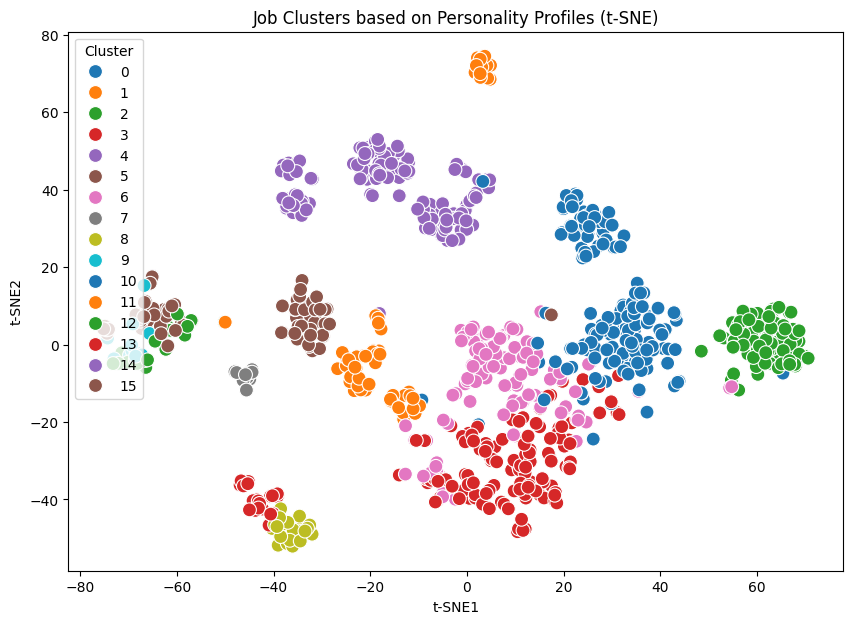

In [39]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(df_onet[features_list])

plt.figure(figsize=(10,7))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1],
                hue=df_onet['cluster'], palette='tab10', s=100)
plt.title('Job Clusters based on Personality Profiles (t-SNE)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Cluster')
plt.show()


In [40]:
columns_to_drop = ['Title', 'Human Characteristics_list', 'Interests_list',
       'Work Styles_list', 'Work Values_list', 'Skills_list']
df_features = df_onet.drop(columns=columns_to_drop, inplace=False)
df_features_mean = df_features.groupby('cluster').mean()

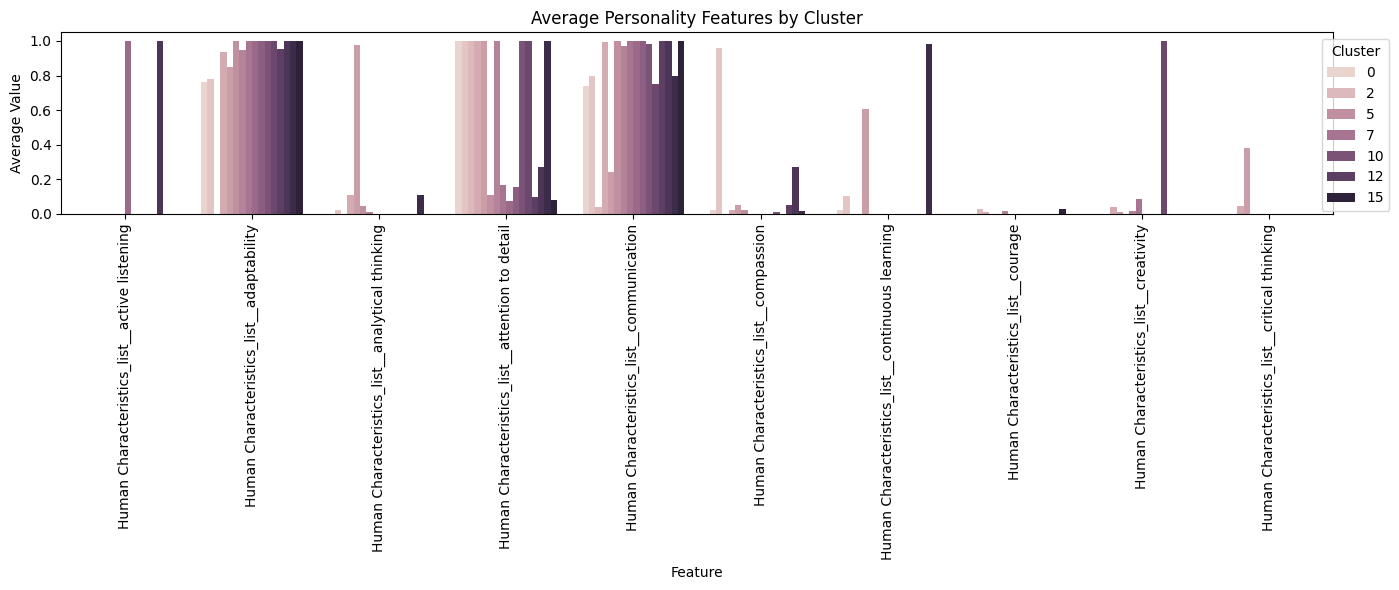

In [41]:
df_long = df_features_mean.iloc[:, :10].reset_index().melt(
    id_vars='cluster',
    var_name='feature',
    value_name='avg_value'
)


plt.figure(figsize=(14,6))
sns.barplot(
    data=df_long,
    x='feature', y='avg_value', hue='cluster'
)
plt.title('Average Personality Features by Cluster')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


**Exploring Feature Variation by Cluster**

In [42]:
# Global mean across all jobs
global_mean = df_features.mean()

# Difference of each cluster’s average from the overall average
df_diff = df_features_mean - global_mean

top_features_per_cluster = {}

for c in df_diff.index:
    # Sort features by absolute difference from the mean
    top_features = df_diff.loc[c].abs().sort_values(ascending=False).head(3).index.tolist()
    top_features_per_cluster[c] = top_features

# Print summary
for c, feats in top_features_per_cluster.items():
    print(f"\nCluster {c} – top distinguishing features:")
    for f in feats:
        diff_val = df_diff.loc[c, f]
        direction = "↑ higher" if diff_val > 0 else "↓ lower"
        print(f"  {f}: {diff_val:.3f} ({direction} than average)")



Cluster 0 – top distinguishing features:
  Human Characteristics_list__troubleshooting: 0.923 (↑ higher than average)
  Human Characteristics_list__technical skills: 0.817 (↑ higher than average)
  Skills_list__repairing: 0.545 (↑ higher than average)

Cluster 1 – top distinguishing features:
  Human Characteristics_list__compassion: 0.883 (↑ higher than average)
  Human Characteristics_list__stress tolerance: 0.863 (↑ higher than average)
  Human Characteristics_list__professionalism: 0.823 (↑ higher than average)

Cluster 2 – top distinguishing features:
  Human Characteristics_list__adaptability: -0.851 (↓ lower than average)
  Human Characteristics_list__problem solving: -0.766 (↓ lower than average)
  Human Characteristics_list__communication: -0.753 (↓ lower than average)

Cluster 3 – top distinguishing features:
  Human Characteristics_list__efficiency: 0.485 (↑ higher than average)
  Human Characteristics_list__physical stamina: 0.477 (↑ higher than average)
  Human Characteri

**Labeling Clusters by Job Titles In Each Cluster**

In [43]:
data = []

for c in sorted(df_onet['cluster'].unique()):
    jobs_in_cluster = df_onet.loc[df_onet['cluster'] == c, 'Title'].tolist()
    # Append a dictionary for each cluster
    data.append({'cluster': c, 'Titles': jobs_in_cluster})
    #print jobs
    # print(f"\nCluster {c}:")
    # for job in jobs_in_cluster:
    #     print("  -", job)

df_title_clusters = pd.DataFrame(data)

df_title_clusters

,cluster,Titles
0,0,[Audiovisual Equipment Installers and Repairer...
1,1,"[Acute Care Nurses, Advanced Practice Psychiat..."
2,2,[Adhesive Bonding Machine Operators and Tender...
3,3,"[Accountants and Auditors, Actuaries, Administ..."
4,4,[Aerospace Engineering and Operations Technolo...
5,5,"[Anesthesiologist Assistants, Billing and Post..."
6,6,"[Actors, Acupuncturists, Adapted Physical Educ..."
7,7,"[Advertising Sales Agents, Door-to-Door Sales ..."
8,8,"[Agricultural Sciences Teachers, Postsecondary..."
9,9,"[Chief Executives, Construction Managers, Firs..."


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def generate_cluster_label(job_titles, n_top_words=3, ngram_range=(1,2)):
    """
    Generate a descriptive cluster label from a list of job titles.

    Args:
        job_titles (list of str): job titles in the cluster
        n_top_words (int): number of top words/phrases to include in the label
        ngram_range (tuple): n-gram range for TF-IDF (default: unigrams + bigrams)

    Returns:
        str: a descriptive cluster label
    """

    # Clean job titles (remove punctuation, convert to lowercase)
    cleaned_titles = [re.sub(r'[^\w\s]', '', title.lower()) for title in job_titles]

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(cleaned_titles)

    # Sum TF-IDF scores across all titles
    tfidf_sum = X.sum(axis=0)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get top n features
    top_indices = tfidf_sum.A1.argsort()[::-1][:n_top_words]  # .A1 flattens matrix
    top_words = [feature_names[i] for i in top_indices]

    # Optional: capitalize first letters
    top_words = [w.title() for w in top_words]

    # Create a label string
    label = ", ".join(top_words)

    return label


In [45]:
for index, row in df_title_clusters.iterrows():
    print("Cluster: ", row['cluster'])
    label = generate_cluster_label(row['Titles'])
    print("Label: ", label, "\n")
    for job_title in row['Titles']:
        print(job_title)
    print()

Cluster:  0
Label:  Repairers, Installers, Equipment 

Audiovisual Equipment Installers and Repairers
Automotive Body and Related Repairers
Automotive Glass Installers and Repairers
Bicycle Repairers
Bus and Truck Mechanics and Diesel Engine Specialists
Camera and Photographic Equipment Repairers
Carpet Installers
Coin, Vending, and Amusement Machine Servicers and Repairers
Computer, Automated Teller, and Office Machine Repairers
Control and Valve Installers and Repairers, Except Mechanical Door
Drywall and Ceiling Tile Installers
Electric Motor, Power Tool, and Related Repairers
Electrical and Electronics Installers and Repairers, Transportation Equipment
Electrical and Electronics Repairers, Commercial and Industrial Equipment
Electrical and Electronics Repairers, Powerhouse, Substation, and Relay
Electrical Power-Line Installers and Repairers
Electromechanical Equipment Assemblers
Electronic Equipment Installers and Repairers, Motor Vehicles
Elevator and Escalator Installers and Rep

In [46]:
from sklearn.model_selection import train_test_split

# Features and labels from MBTI data
X = df_mbti["posts"]
y = df_mbti["type"]

# 70% train, 15% valid, 15% test (stratified by type)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape[0])
print("Valid:", X_valid.shape[0])
print("Test:",  X_test.shape[0])


Train: 6072
Valid: 1301
Test: 1302


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_valid_vec = tfidf.transform(X_valid)
X_test_vec  = tfidf.transform(X_test)

X_train_vec.shape

(6072, 20000)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "logreg": LogisticRegression(
        max_iter=2000,
        n_jobs=-1,
        random_state=42
    ),
    "linear_svc": LinearSVC(random_state=42),
    "rf": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    )
}

valid_scores = {}

for name, clf in models.items():
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_valid_vec)
    acc = accuracy_score(y_valid, y_pred)
    valid_scores[name] = acc
    print(f"\n=== {name} ===")
    print("Validation accuracy:", acc)



=== logreg ===
Validation accuracy: 0.6164488854727133

=== linear_svc ===
Validation accuracy: 0.6510376633358954

=== rf ===
Validation accuracy: 0.5511145272867025


In [49]:
from sklearn.ensemble import VotingClassifier

best_models = {
    name: models[name]
    for name in ["logreg", "rf"]
}

# Refit best base models on train+valid
from scipy.sparse import vstack

X_train_full = vstack([X_train_vec, X_valid_vec])
y_train_full = pd.concat([y_train, y_valid])

for name, clf in best_models.items():
    clf.fit(X_train_full, y_train_full)

ensemble = VotingClassifier(
    estimators=[(n, m) for n, m in best_models.items()],
    voting="hard"  # (hard because RandomForest has proba but LinearSVC doesn't)
)

ensemble.fit(X_train_full, y_train_full)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=2000, n_jobs=-1,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42))])

In [50]:
def evaluate_model(clf, X, y_true, name="model"):
    y_pred = clf.predict(X)
    acc = accuracy_score(y_true, y_pred)
    print(f"\n{name} – Test accuracy: {acc:.3f}")
    print(classification_report(y_true, y_pred))
    return acc

print("=== Final Test Performance ===")
test_scores = {}
for name, clf in {**best_models, "ensemble": ensemble}.items():
    test_scores[name] = evaluate_model(clf, X_test_vec, y_test, name=name)

=== Final Test Performance ===

logreg – Test accuracy: 0.645
              precision    recall  f1-score   support

        ENFJ       0.50      0.07      0.12        28
        ENFP       0.69      0.58      0.63       102
        ENTJ       0.62      0.15      0.24        34
        ENTP       0.73      0.61      0.67       103
        ESFJ       0.00      0.00      0.00         6
        ESFP       0.00      0.00      0.00         7
        ESTJ       0.00      0.00      0.00         6
        ESTP       0.00      0.00      0.00        13
        INFJ       0.66      0.69      0.67       221
        INFP       0.59      0.89      0.71       275
        INTJ       0.64      0.66      0.65       164
        INTP       0.66      0.82      0.73       196
        ISFJ       1.00      0.08      0.15        25
        ISFP       0.82      0.22      0.35        41
        ISTJ       0.75      0.20      0.32        30
        ISTP       0.80      0.55      0.65        51

    accuracy      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



rf – Test accuracy: 0.582
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        28
        ENFP       0.73      0.42      0.53       102
        ENTJ       1.00      0.06      0.11        34
        ENTP       0.69      0.42      0.52       103
        ESFJ       0.00      0.00      0.00         6
        ESFP       0.00      0.00      0.00         7
        ESTJ       0.00      0.00      0.00         6
        ESTP       0.00      0.00      0.00        13
        INFJ       0.57      0.72      0.64       221
        INFP       0.50      0.92      0.65       275
        INTJ       0.67      0.57      0.61       164
        INTP       0.62      0.75      0.68       196
        ISFJ       0.00      0.00      0.00        25
        ISFP       0.00      0.00      0.00        41
        ISTJ       0.00      0.00      0.00        30
        ISTP       0.94      0.33      0.49        51

    accuracy                           0.58      1302

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ensemble – Test accuracy: 0.614
              precision    recall  f1-score   support

        ENFJ       0.50      0.07      0.12        28
        ENFP       0.67      0.62      0.64       102
        ENTJ       0.75      0.18      0.29        34
        ENTP       0.70      0.62      0.66       103
        ESFJ       0.00      0.00      0.00         6
        ESFP       0.00      0.00      0.00         7
        ESTJ       0.00      0.00      0.00         6
        ESTP       0.00      0.00      0.00        13
        INFJ       0.58      0.76      0.65       221
        INFP       0.54      0.89      0.67       275
        INTJ       0.68      0.60      0.64       164
        INTP       0.71      0.69      0.70       196
        ISFJ       0.00      0.00      0.00        25
        ISFP       0.00      0.00      0.00        41
        ISTJ       0.00      0.00      0.00        30
        ISTP       0.94      0.29      0.45        51

    accuracy                           0.61    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [52]:
!git clone https://github.com/caricon-ai/caricon-personality-career-matching.git

Cloning into 'caricon-personality-career-matching'...
fatal: could not read Username for 'https://github.com': No such device or address


In [53]:
!git clone https://github.com/HassanDataSci/caricon-personality-career-matching.git

Cloning into 'caricon-personality-career-matching'...
fatal: could not read Username for 'https://github.com': No such device or address
